In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import cv2
from tkinter import *
from tkinter import filedialog
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
global H_list
H_list=[]
global H_total
H_total=np.zeros((480, 640))
count_=0

In [3]:
def multi_gaussian(pos, mu, si):
  n = mu.shape[0]
  Sig_det = np.linalg.det(si)
  Sig_inv = np.linalg.inv(si)
  N = np.sqrt((2*np.pi)**n * Sig_det)
  fac = np.einsum('...k,kl,...l->...', pos-mu, Sig_inv,pos-mu)
  return np.exp(-fac/2)/N

In [4]:
for iter in range(3):
    global Gaussian_Matrix
    Gaussian_Matrix=[]

    def gauss(x,y):
        mu = np.array([x,y])
        sd=np.std([640,480])
        Sigma = np.array([[sd,0],[0,sd]])
        X=np.linspace(0,640,640)
        Y=np.linspace(0,480,480)
        X, Y = np.meshgrid(X,Y)
        # print(X.shape+(2,))
        pos = np.empty(X.shape+(2,))
        pos[:,:,0] = X
        pos[:,:,1] = Y
        Z = multi_gaussian(pos, mu, Sigma)
        # plt.imshow(Z)
        # plt.show()
        Gaussian_Matrix.append(Z)

    def Capture_Events(event,x,y,flags,params):
        if event == cv2.EVENT_LBUTTONDOWN:
            gauss(x,y)

    if __name__ == "__main__":
        global fln 
        fln=filedialog.askopenfilename(initialdir=os.getcwd(),title="Select Image File",filetypes=(("ALL FILES","*"),("JPG file","*.jpg"),("PNG file","*.png")))

        img = cv2.imread(fln,0)



        img = cv2.resize(img, (640, 480))

        img = np.array(255*(img / 255) ** 0.1, dtype = 'uint8')
        # img = cv2.equalizeHist(img)
        # img = cv2.equalizeHist(img)
        # clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
        # img = clahe.apply(img)
        # c = 255 / np.log(1 + np.max(img))
        # log_image = c * (np.log(img + 1))
        # img = np.array(log_image, dtype = np.uint8)





        cv2.imshow((f"{iter}"),img)
        # cv2.imshow(fln,img)


        cv2.setMouseCallback((f"{iter}"),Capture_Events)
        cv2.waitKey(0)
        cv2.destroyAllWindows()


        M1M2arr = np.sum(Gaussian_Matrix, axis=0)
        # cb=plt.imshow(M1M2arr)
        # cv=plt.imsave("E:\Programming\Project\Test\Gaussian_Plot.jpeg",M1M2arr)

        
        G = np.fft.fft2(M1M2arr)
        # img2=img2[:,:,0]
        F = np.fft.fft2(img)
        H = np.divide(G,F)
        H_list.append(H)
        H_total=np.add(H_total,H)
        count_=count_+1

In [5]:
H_avg=H_total/count_
# np.savetxt("H_avg.txt",H_avg,fmt=float,delimiter="\t")

In [6]:
np.shape(H_avg)

(480, 640)

In [7]:
h=np.fft.ifft2(H_avg)

In [8]:
# image=cv2.imread("a (4).jpeg",0)
# image=cv2.resize(image,(640,480))
# np.savetxt('matrix.txt', image, fmt='%.18e', delimiter='\t')
# image=cv2.equalizeHist(image)
# final=np.multiply(h,image)
# # plt.imshow(np.real(final))

In [13]:
image=cv2.imread("1 (4).jpeg",0)
image=cv2.resize(image,(640,480))
# image=cv2.equalizeHist(image)
# c = 255 / np.log(1 + np.max(image))
# log_image = c * (np.log(image + 1))
# image = np.array(log_image, dtype = np.uint8)
image = np.array(255*(image / 255) ** 0.1, dtype = 'uint8')


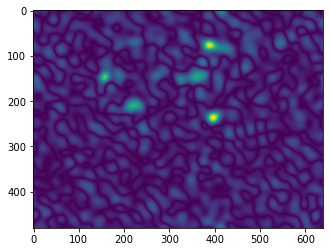

In [14]:
image_f=np.fft.fft2(image)
f_=np.multiply(H_avg,image_f)
f_=np.fft.ifft2(f_)
plt.imshow(np.abs(f_))